<a href="https://colab.research.google.com/github/Evelin-Garcia/Desafio_Alura_Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [12]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



Facturación Total:

Análisis por tienda: De acuerdo a los datos proporcionados se analizan los **ingresos totales** de cada tienda sumando los valores de la columna **Precio** de cada conjunto de datos de la tienda.


In [3]:
#Ingresos por tienda
ingreso_tienda1 = tienda["Precio"].sum()
ingreso_tienda2 = tienda2["Precio"].sum()
ingreso_tienda3 = tienda3["Precio"].sum()
ingreso_tienda4 = tienda4["Precio"].sum()

#Muestra resultados
print(f'Ingresos de la tienda 1: ${ingreso_tienda1:,.1f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Ingresos de la tienda 2: ${ingreso_tienda2:,.1f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Ingresos de la tienda 3: ${ingreso_tienda3:,.1f}'.replace(",", "X").replace(".", ",").replace("X", "."))
print(f'Ingresos de la tienda 4: ${ingreso_tienda4:,.1f}'.replace(",", "X").replace(".", ",").replace("X", "."))


Ingresos de la tienda 1: $1.150.880.400,0
Ingresos de la tienda 2: $1.116.343.500,0
Ingresos de la tienda 3: $1.098.019.600,0
Ingresos de la tienda 4: $1.038.375.700,0


Gráfico de barras que muestra la comparación de ventas totales de cada tienda:

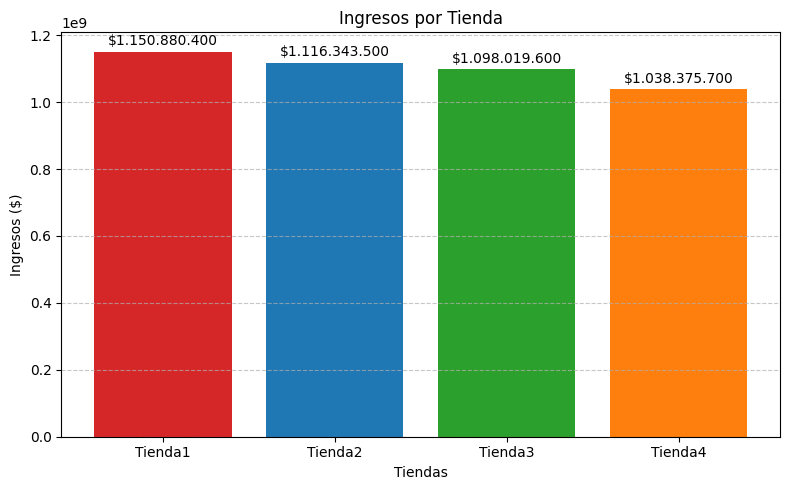

In [49]:
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
ingresos = [ingreso_tienda1, ingreso_tienda2, ingreso_tienda3, ingreso_tienda4]

# Crear gráfico
plt.figure(figsize=(8,5))
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']
barras = plt.bar(tiendas, ingresos, color=bar_colors)

# Agregar títulos y etiquetas
plt.title('Ingresos por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar valores arriba de las barras
for barra, ingreso in zip(barras, ingresos):
    altura = barra.get_height()
    ingreso_formateado = f'{int(ingreso):,}'.replace(',', '.')
    plt.text(barra.get_x() + barra.get_width()/2, altura + altura*0.01,
             f'${ingreso_formateado}', ha='center', va='bottom', fontsize=10)

# Mostrar gráfico
plt.tight_layout()
plt.show()

# 2. Ventas por categoría:

Se calcula la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [4]:
ingreso_por_categoria_tienda = tienda.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values()
print(f'La cantidad de ventas por categoria de la tienda 1 es: \n{ingreso_por_categoria_tienda}')

categoria_mas_vendida_tienda = ingreso_por_categoria_tienda.idxmax()
print(f'La categoria mas vendida en la tienda 1 es: {categoria_mas_vendida_tienda}')
print('\n--------------')

ingreso_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values()
print(f'\nLa cantidad de ventas por categoria de la tienda 2 es: \n{ingreso_por_categoria_tienda2}')

categoria_mas_vendida_tienda2 = ingreso_por_categoria_tienda2.idxmax()
print(f'La categoria mas vendida en la tienda 2 es: {categoria_mas_vendida_tienda2}')
print('\n--------------')

ingreso_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values()
print(f'La cantidad de ventas por categoria de la tienda 3 es: \n{ingreso_por_categoria_tienda3}')

categoria_mas_vendida_tienda3 = ingreso_por_categoria_tienda3.idxmax()
print(f'La categoria mas vendida en la tienda 3 es: {categoria_mas_vendida_tienda3}')
print('\n--------------')

ingreso_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Categoría del Producto'].count().sort_values()
print(f'La cantidad de ventas por categoria de la tienda 4 es: \n{ingreso_por_categoria_tienda4}')

categoria_mas_vendida_tienda4 = ingreso_por_categoria_tienda4.idxmax()
print(f'La categoria mas vendida en la tienda 4 es: {categoria_mas_vendida_tienda4}')
print('\n--------------')


La cantidad de ventas por categoria de la tienda 1 es: 
Categoría del Producto
Artículos para el hogar    171
Libros                     173
Instrumentos musicales     182
Deportes y diversión       284
Electrodomésticos          312
Juguetes                   324
Electrónicos               448
Muebles                    465
Name: Categoría del Producto, dtype: int64
La categoria mas vendida en la tienda 1 es: Muebles

--------------

La cantidad de ventas por categoria de la tienda 2 es: 
Categoría del Producto
Artículos para el hogar    181
Libros                     197
Instrumentos musicales     224
Deportes y diversión       275
Electrodomésticos          305
Juguetes                   313
Electrónicos               422
Muebles                    442
Name: Categoría del Producto, dtype: int64
La categoria mas vendida en la tienda 2 es: Muebles

--------------
La cantidad de ventas por categoria de la tienda 3 es: 
Categoría del Producto
Artículos para el hogar    177
Instrumentos 

# 3. Calificación promedio de la tienda


In [5]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for i, df in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]

    # Calcular la calificación promedio
    calificacion_promedio = df['Calificación'].mean()
    calificacion_promedio = "%.2f" % calificacion_promedio

    # Mostrar el resultado
    print(f'\n{nombre_tienda}:')
    print(f'La Calificación promedio de la tienda es: {calificacion_promedio}')


Tienda 1:
La Calificación promedio de la tienda es: 3.98

Tienda 2:
La Calificación promedio de la tienda es: 4.04

Tienda 3:
La Calificación promedio de la tienda es: 4.05

Tienda 4:
La Calificación promedio de la tienda es: 4.00


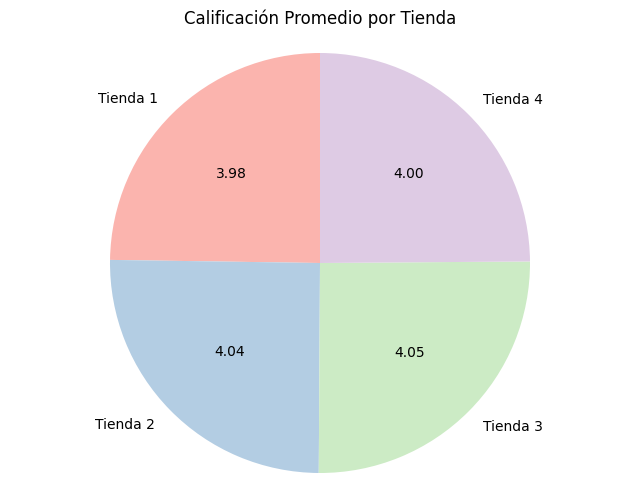

In [17]:
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Calcular promedios
calificaciones = []
for df in tiendas:
    promedio = df['Calificación'].mean()
    calificaciones.append(promedio)

# Función para mostrar el valor real en la torta
def mostrar_valores(pct, all_vals):
    total = sum(all_vals)
    valor = pct * total / 100
    return f'{valor:.2f}'

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.pie(
    calificaciones,
    labels=nombres_tiendas,
    autopct=lambda pct: mostrar_valores(pct, calificaciones),
    startangle=90,
    colors=plt.cm.Pastel1.colors
)

plt.title('Calificación Promedio por Tienda')
plt.axis('equal')  # Para que sea redondo
plt.show()


# 4. Productos más y menos vendidos


Tienda 1:
El producto más vendido es "Microondas" con 60 unidades vendidas.
El producto menos vendido es "Auriculares con micrófono" con 33 unidades vendidas.


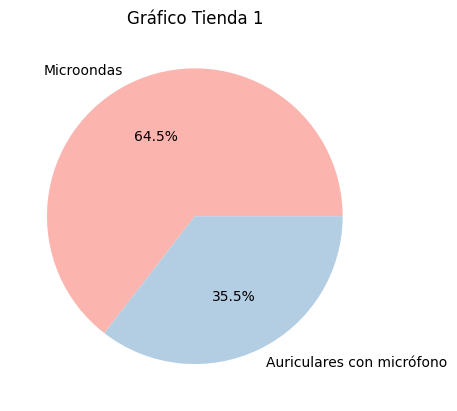


---------------------------------------------------------

Tienda 2:
El producto más vendido es "Iniciando en programación" con 65 unidades vendidas.
El producto menos vendido es "Juego de mesa" con 32 unidades vendidas.


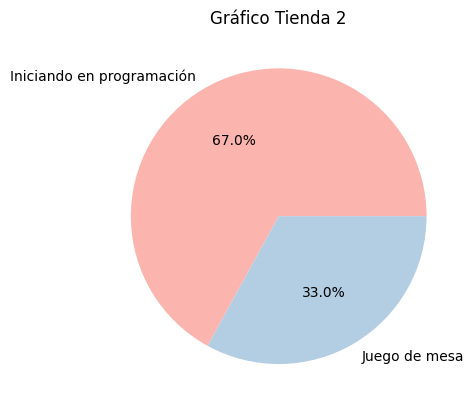


---------------------------------------------------------

Tienda 3:
El producto más vendido es "Kit de bancas" con 57 unidades vendidas.
El producto menos vendido es "Bloques de construcción" con 35 unidades vendidas.


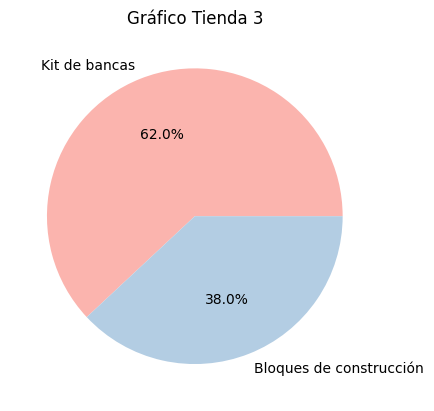


---------------------------------------------------------

Tienda 4:
El producto más vendido es "Cama box" con 62 unidades vendidas.
El producto menos vendido es "Guitarra eléctrica" con 33 unidades vendidas.


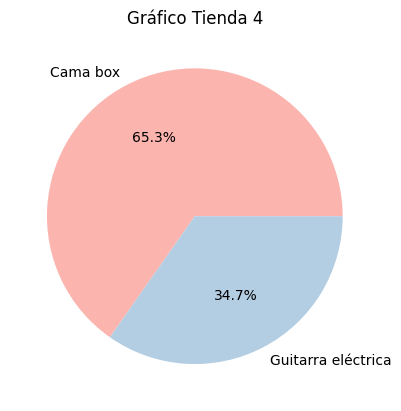


---------------------------------------------------------


In [7]:
# Lista de tiendas
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Recorrido por cada tienda
for i, tienda in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]

    # Contar productos vendidos
    productos_vendidos = tienda['Producto'].value_counts()

    # Producto más vendido y cantidad
    producto_mas_vendido = productos_vendidos.idxmax()
    cantidad_mas_vendido = productos_vendidos.max()

    # Producto menos vendido y cantidad
    producto_menos_vendido = productos_vendidos.idxmin()
    cantidad_menos_vendido = productos_vendidos.min()

    # Mostrar resultados
    print(f'\n{nombre_tienda}:')
    print(f'El producto más vendido es "{producto_mas_vendido}" con {cantidad_mas_vendido} unidades vendidas.')
    print(f'El producto menos vendido es "{producto_menos_vendido}" con {cantidad_menos_vendido} unidades vendidas.')

#Grafico
    plt.pie(x=[cantidad_mas_vendido, cantidad_menos_vendido], labels=[producto_mas_vendido, producto_menos_vendido], autopct='%1.1f%%', colors=plt.cm.Pastel1.colors )
    plt.title(f'Gráfico {nombre_tienda}')
    plt.show()
    print('\n---------------------------------------------------------')

# 5. Envío promedio por tienda

In [16]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Recorrido por cada tienda
for i, tienda in enumerate(tiendas):
    nombre_tienda = nombres_tiendas[i]

    # Calcular el envío promedio
    envio_promedio = tienda['Costo de envío'].mean()
    costo_total = tienda['Costo de envío'].sum()
    cantidad_envios = tienda['Costo de envío'].count()
    envio_promedio = "%.0f" % envio_promedio

#Mostrar resultados
    print(f'\n{nombre_tienda}:')
    print(f'El envío promedio de la tienda es: ${envio_promedio}')
    print(f'El costo total de los envios de la tienda es: ${costo_total}')
    print(f'La cantidad de envios realizados en la tienda es: {cantidad_envios}')


Tienda 1:
El envío promedio de la tienda es: $26019
El costo total de los envios de la tienda es: $61377900.0
La cantidad de envios realizados en la tienda es: 2359

Tienda 2:
El envío promedio de la tienda es: $25216
El costo total de los envios de la tienda es: $59485100.0
La cantidad de envios realizados en la tienda es: 2359

Tienda 3:
El envío promedio de la tienda es: $24806
El costo total de los envios de la tienda es: $58516600.0
La cantidad de envios realizados en la tienda es: 2359

Tienda 4:
El envío promedio de la tienda es: $23459
El costo total de los envios de la tienda es: $55317400.0
La cantidad de envios realizados en la tienda es: 2358


#INFORME FINAL: Recomendación sobre venta de tienda.

El objetivo de este informe es orientar al Sr. Juan sobre la decisión de  qué tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento. Para ello, se analizaron datos de ventas, rendimiento, categorías más y menos vendidas y reseñas de las 4 tiendas de Alura Store.

El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.

Teniendo en cuenta los datos analizados podemos concluir, que si bien prácticamente todas las tiendas presentan índices similares en cuanto a categorías más y menos vendidas, satisfacción de clientes, número total de ventas y costo de envíos; es la tienda 4, la que si bien posee un costo de envío menor y cantidad de ventas totales prácticamente iguales al resto; su ingreso total final es el menor de las cuatro tiendas estudiadas.

**Basado sólo en los parámetros estudiados y sus conclusiones, es que se recomienda vender la Tienda 4 y así destinar sus recursos a un posible nuevo emprendimiento.**